In [ ]:
%pip install openpyxl
%pip install numpy
# %pip install hello
%pip install reportlab

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hello (from versions: none)
ERROR: No matching distribution found for hello


In [12]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

auto=pd.read_excel(r"BDA_Pre_Screening_Auto.xlsx",engine='openpyxl')
auto.drop(index=[0,1,2,3],inplace=True)

In [18]:
auto.reset_index(drop=True,inplace=True)
auto.columns

Index(['Id', 'Title', 'Brand', 'Product', 'Category', 'Network',
       'Network Type', 'Show', 'Date', 'Time', 'Pod Position', 'Dayparts',
       'Co-Op Brand', 'Co-Op Product', 'Duration', 'EQ Units', 'Spend ($)',
       'Broadcast Year', 'Broadcast Month', 'Broadcast Week', 'Day Of Week',
       'Hour Of Day', 'TimeZone', 'Quarter'],
      dtype='object')

In [6]:
auto.columns
auto['Co-Op Brand'].nunique()
auto['Co-Op Product'].nunique()
auto.drop(columns={'Co-Op Brand','Co-Op Product'},inplace=True)

In [13]:
duplicated=auto['Id'].duplicated()
duplicated.unique()
auto['Date']=pd.to_datetime(auto['Date'])
auto['Quarter']=auto['Date'].dt.quarter

In [17]:
net=auto.groupby(['Network','Network Type']).agg({'Id':'count','Spend ($)':'sum'}).reset_index()
net.columns=['Network','Network Type','Airings','Spend']
net['Efficiency']=net['Spend']/net['Airings']
net.sort_values(by='Efficiency',ascending=False,inplace=True)
net['Efficiency']=net['Efficiency'].apply(lambda x:f'{x:,.2f}')
net['Spend']=net['Spend'].apply(lambda x:f'{x:,}')
net.head(25)

,Network,Network Type,Airings,Spend,Efficiency
1,ABC,broadcast,998,"32,879,542","32,945.43"
83,NBC,broadcast,2175,"68,335,956","31,418.83"
18,CBS,broadcast,1320,"39,498,254","29,922.92"
41,FOX,broadcast,1744,"43,988,482","25,222.75"
35,ESPN,cable,8010,"61,577,145","7,687.53"
108,TBS,cable,876,"4,431,704","5,059.02"
59,HGTV,cable,2128,"10,255,410","4,819.27"
110,TNT,cable,649,"2,873,485","4,427.56"
39,ESPNews,cable,26,"101,731","3,912.73"
119,USA Network,cable,2610,"9,266,462","3,550.37"


In [27]:
show=auto.groupby(['Show','Dayparts']).agg({'Id':'count','Spend ($)':'sum'}).reset_index()
show.columns=['Show','Dayparts','Airings','Spend']
show['Efficiency']=show['Spend']/show['Airings']
show.sort_values(by='Efficiency',ascending=False,inplace=True)
show['Efficiency']=show['Efficiency'].apply(lambda x:f'{x:,.2f}')
show.head(50)

,Show,Dayparts,Airings,Spend,Efficiency
14189,Super Bowl LV,PRIME TIME,6,9373523,"1,562,253.83"
595,89th Annual Christmas in Rockefeller Center,PRIME TIME,1,99797,"99,797.00"
14562,The 55th Annual CMA Awards,PRIME TIME,4,368607,"92,151.75"
18375,mixed-ish,PRIME TIME,1,91525,"91,525.00"
9056,Live in Front of a Studio Audience: The Facts ...,PRIME TIME,1,90166,"90,166.00"
2939,Call Your Mother,PRIME TIME,5,447560,"89,512.00"
14561,The 44th Annual Kennedy Center Honors,PRIME TIME,1,86018,"86,018.00"
14883,The Conners,PRIME TIME,5,420728,"84,145.60"
4246,Dancing With the Stars,PRIME TIME,5,412164,"82,432.80"
16212,The Wonder Years,PRIME TIME,1,81009,"81,009.00"


In [30]:
channel=auto.groupby(['Brand','Network','Dayparts']).agg({'Id':'count','Spend ($)':'sum'}).reset_index()
channel.columns=['Brand','Network','Dayparts','Airings','Spend']
channel['Efficiency']=channel['Spend']/channel['Airings']
channel['Efficiency']=channel['Efficiency'].apply(lambda x:f'{x:,.2f}')
channel.sort_values(by=['Brand','Efficiency'],ascending=False,inplace=True)
channel

,Brand,Network,Dayparts,Airings,Spend,Efficiency
3195,Toyota,Weather,WEEKEND,57,56554,992.18
2936,Toyota,NBA TV,EARLY FRINGE,117,11621,99.32
2765,Toyota,FOX Sports Southwest Main Feed,PRIME TIME,26,2552,98.15
3064,Toyota,Syfy,EARLY FRINGE,136,130994,963.19
2623,Toyota,CNN International,WEEKEND,1,96,96.00
...,...,...,...,...,...,...
202,BMW,NBC Sports Bay Area,PRIME ACCESS,3,0,0.00
203,BMW,NBC Sports Bay Area,PRIME TIME,42,0,0.00
204,BMW,NBC Sports Bay Area,WEEKEND,20,0,0.00
336,BMW,Yes Network,PRIME ACCESS,1,0,0.00


In [97]:
print(auto['Brand'].head())
pd.set_option('display.float_format', '{:,.2f}'.format)

In [98]:
auto['Brand']=auto['Brand'].astype(str)
airings=auto.pivot_table(index='Brand',columns='Quarter',values='Id',aggfunc='count').reset_index()
airings.columns=['Brand']+[f'Q{i}' for i in range(1,auto['Quarter'].nunique()+1)]
airings.loc[len(airings)]={'Brand':'Total',**{f'Q{i}':airings[f'Q{i}'].sum() for i in range(1,auto['Quarter'].nunique()+1)}}
for i in range(1,auto['Quarter'].nunique()):
    airings[f'percent_change_from_Q{i}']=((airings[f'Q{i+1}']-airings[f'Q{i}'])/airings[f'Q{i}'])*100
airings=airings[['Brand','Q1','Q2','percent_change_from_Q1','Q3','percent_change_from_Q2','Q4','percent_change_from_Q3']]
for i in range(1, auto['Quarter'].nunique() + 1):
    airings[f'percent_share_duration_Q{i}']=airings[f'Q{i}']*100/airings.loc[len(airings)-1,f'Q{i}']
airings=airings[['Brand','Q1',f'percent_share_duration_Q1','Q2',f'percent_share_duration_Q2','percent_change_from_Q1','Q3',f'percent_share_duration_Q3','percent_change_from_Q2','Q4',f'percent_share_duration_Q4','percent_change_from_Q3']]
airings

In [99]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
m,n=0,0
for i in range(1,auto['Quarter'].nunique()+1):
    if i==1:
        m,n=0,0
    elif i==2:
        m,n=0,1
    elif i==3:
        m,n=1,0
    elif i==4:
        m,n=1,1
    axes[m, n].pie(airings[~(airings['Brand']=='Total')][f'Q{i}'], 
                   labels=airings[~(airings['Brand']=='Total')]['Brand'], 
                   autopct='%1.1f%%',startangle=90,shadow=False)
    axes[m,n].set_title(f'Q{i}')
plt.tight_layout()
# plt.legend(loc='upper left',bbox_to_anchor=(0, 1))
plt.show()

0    Toyota
1    Toyota
2    Toyota
3      Ford
4     Lexus
Name: Brand, dtype: object


In [118]:
plt.figure(figsize=(10,6))
for brand in airings['Brand']:
    if brand != 'Total':
        plt.plot(auto['Quarter'].unique(), airings[airings['Brand'] == brand].values[0][[2,4,7,10]],marker='o', label=brand)
plt.title('Percentage Change in Spend Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Brands',loc='upper left')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Q1','Q2','Q3','Q4'])
plt.show()
# plt.show()

,Brand,Q1,percent_share_duration_Q1,Q2,percent_share_duration_Q2,percent_change_from_Q1,Q3,percent_share_duration_Q3,percent_change_from_Q2,Q4,percent_share_duration_Q4,percent_change_from_Q3
0,BMW,292,0.52,1818,3.82,522.60,819,1.72,-54.95,2706,5.52,230.40
1,Chevrolet,8154,14.64,5677,11.94,-30.38,7844,16.43,38.17,5588,11.40,-28.76
2,Ford,10546,18.93,8906,18.72,-15.55,6603,13.83,-25.86,4767,9.72,-27.81
3,Honda,7590,13.62,3863,8.12,-49.10,568,1.19,-85.30,5831,11.90,926.58
4,Lexus,20813,37.36,19164,40.29,-7.92,17845,37.38,-6.88,21413,43.68,19.99
5,Toyota,8315,14.93,8137,17.11,-2.14,14061,29.45,72.80,8715,17.78,-38.02
6,Total,55710,100.00,47565,100.00,-14.62,47740,100.00,0.37,49020,100.00,2.68


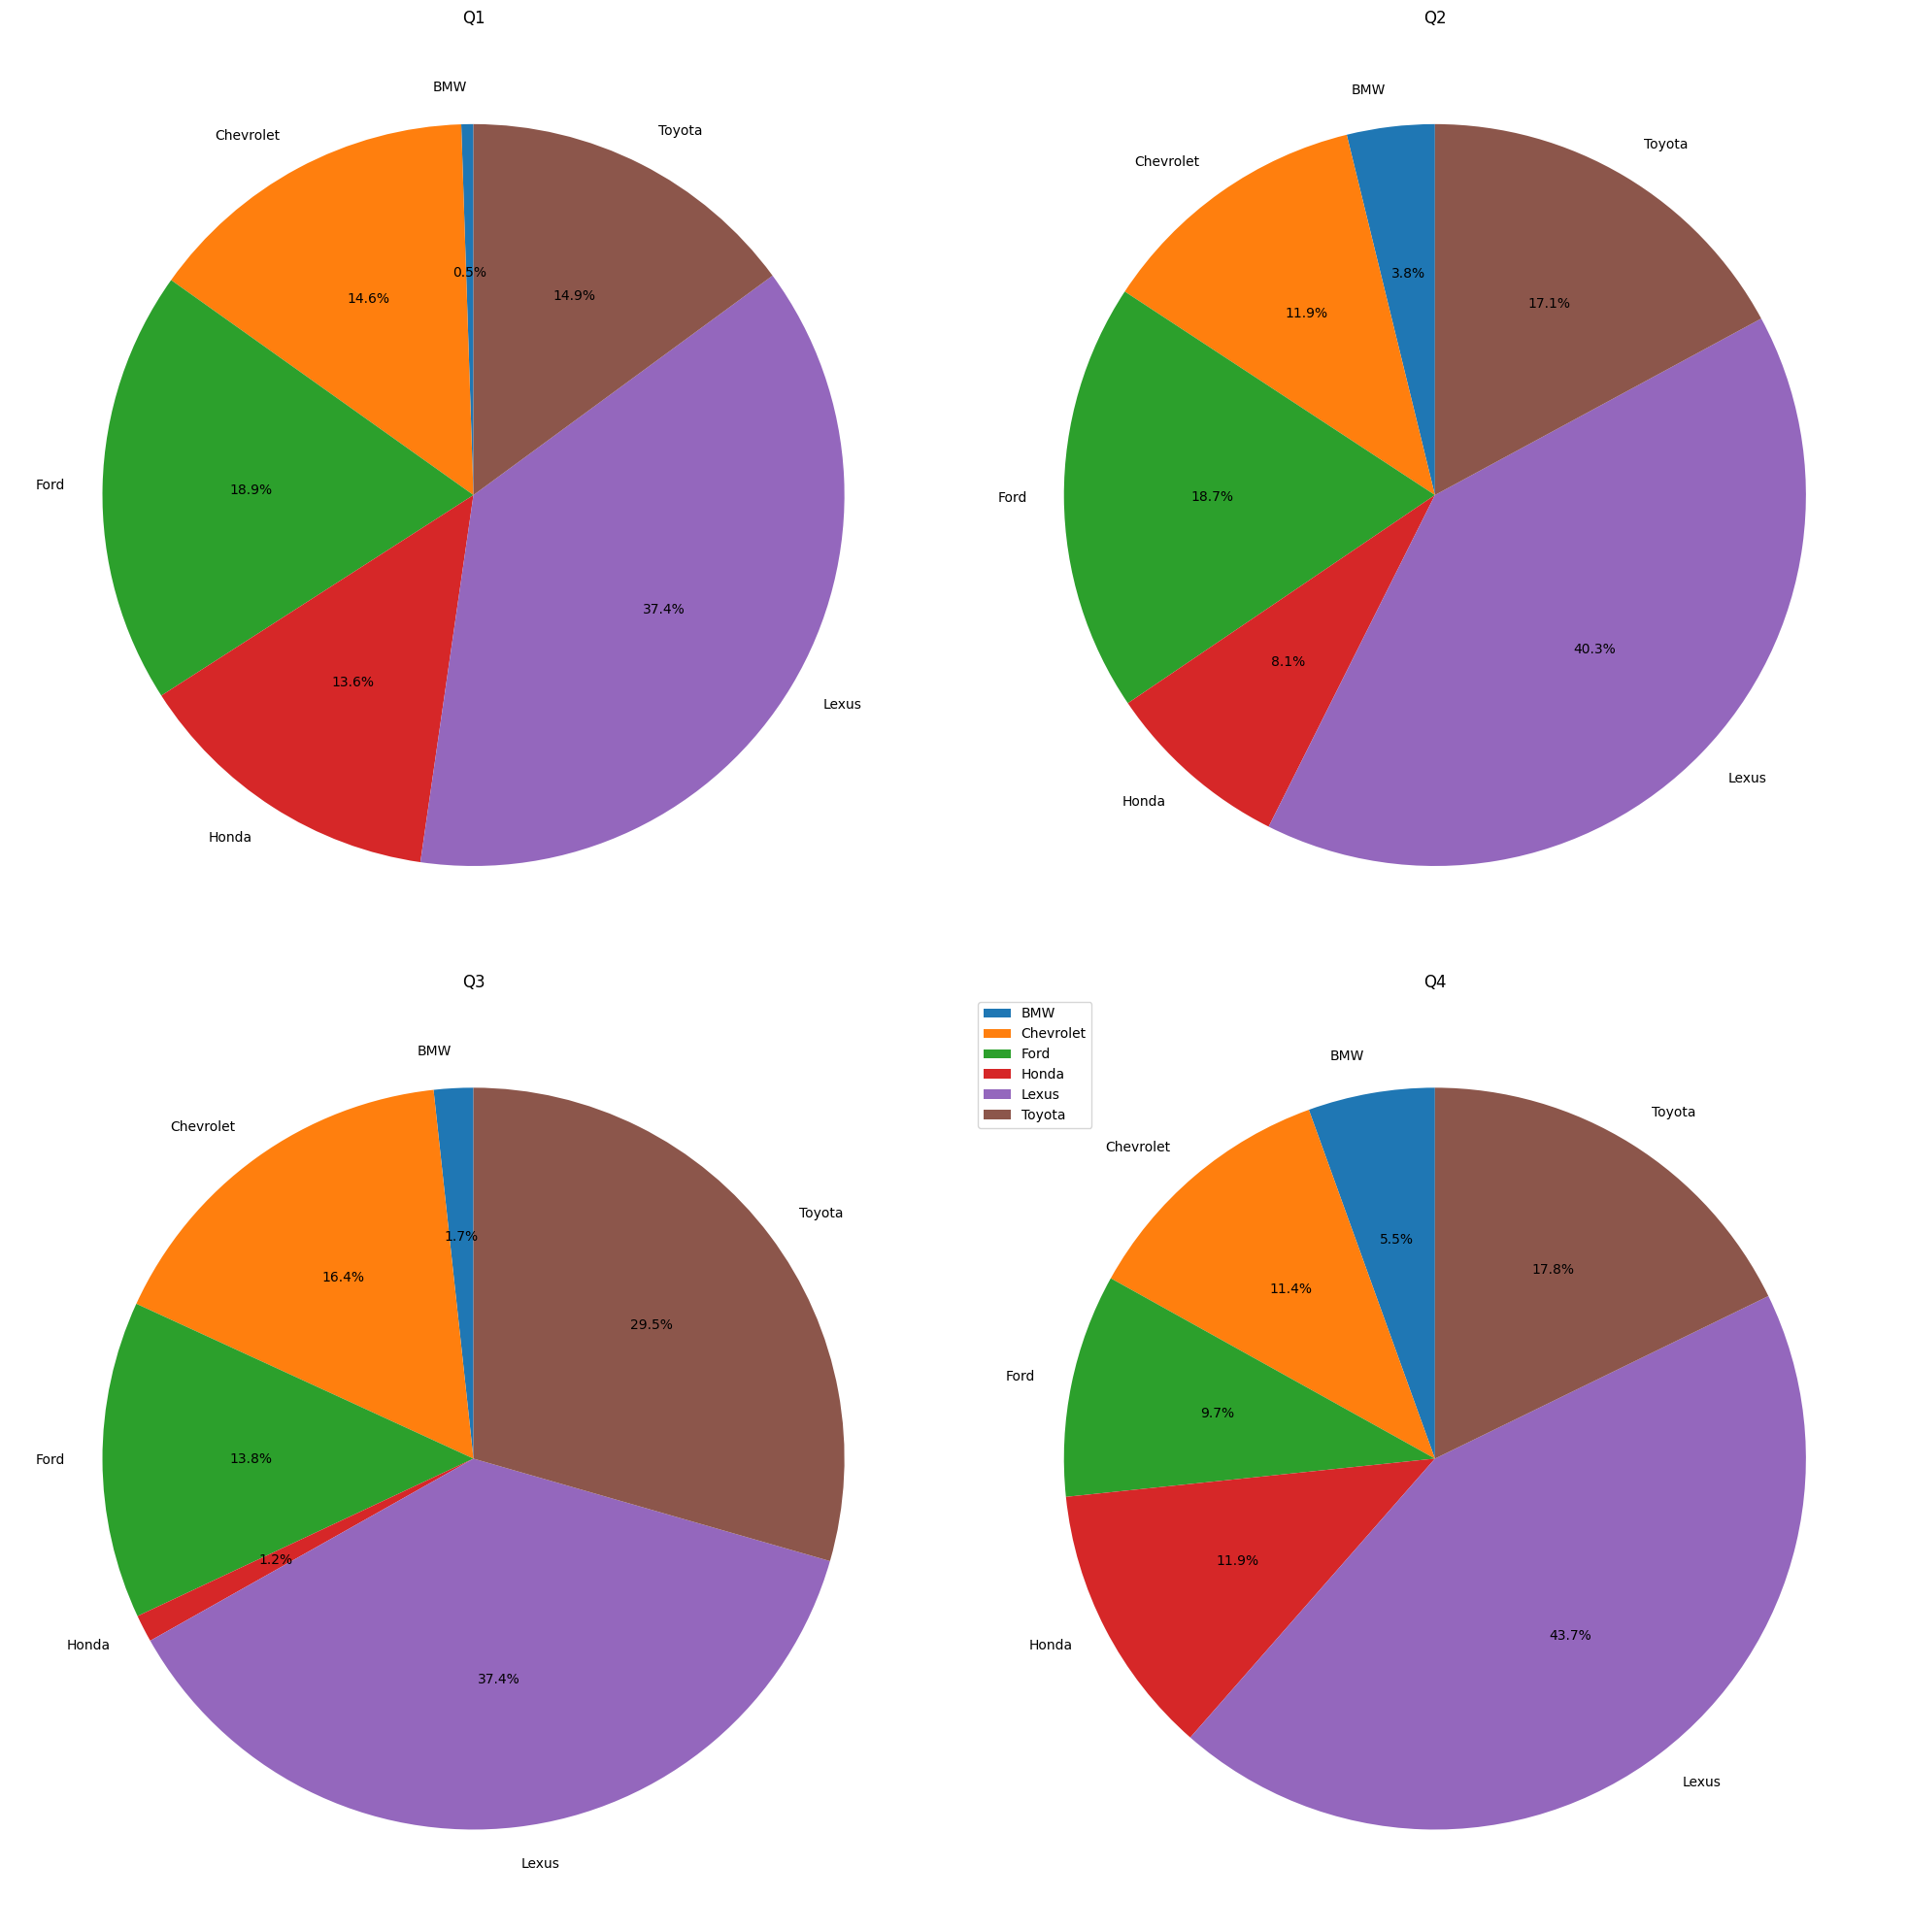

In [101]:

auto.pivot_table(index='Brand',columns='Quarter',values='Spend ($)',aggfunc='sum')
auto.groupby(['Brand','Quarter'])['Duration'].pct_change().reset_index(name='Change in Duration of Ads')

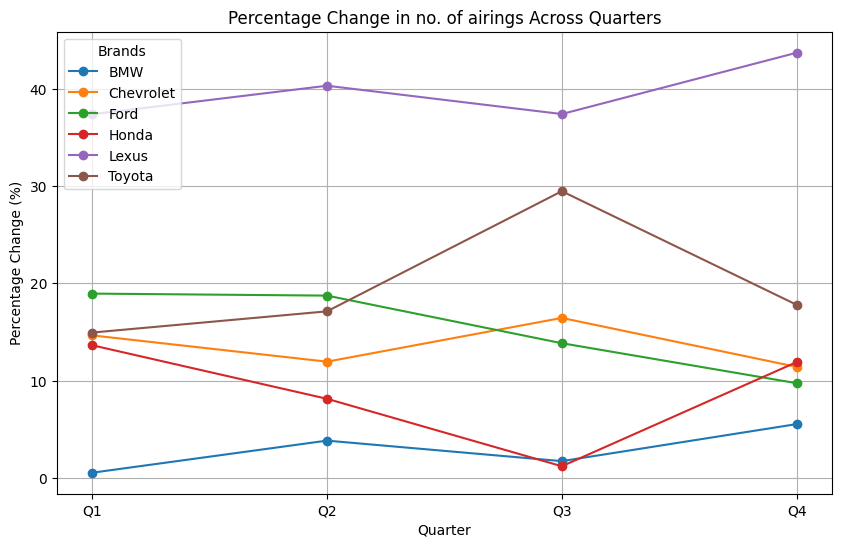

In [ ]:

auto.pivot_table(index='Brand',columns='Quarter',values='Spend ($)',aggfunc='sum')
auto.groupby(['Brand','Quarter'])['Duration'].pct_change().reset_index(name='Change in Duration of Ads')

In [10]:
adv=auto.groupby(['Brand']).agg({'Spend ($)':'sum','Id':'count'}).reset_index()
adv.columns=['Brand','Total Spend','Total Airings']
adv['efficiency']=adv['Total Spend']/adv['Total Airings']
adv.sort_values(by='efficiency',ascending=False,inplace=True)
adv

,Brand,Total Spend,Total Airings,efficiency
2,Ford,110902172,30822,3598.149763
5,Toyota,112904683,39228,2878.165672
1,Chevrolet,60633295,27263,2224.014048
3,Honda,38388361,17852,2150.367522
0,BMW,11149771,5635,1978.663886
4,Lexus,110349428,79235,1392.685404
